<a href="https://colab.research.google.com/github/turkeratac/Python-Bitcoin-Analysis-AI/blob/main/BitcoinAnalysisAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About Dataset**

This dataset contains historical price data for Bitcoin (BTC/USDT) from January 1, 2018, to September 6, 2024. The data was sourced using both the Binance API and Yahoo Finance.
**   **
This dataset includes the following fields for each timeframe**:**

Open time: The timestamp for when the interval began.

Open price: The price of Bitcoin at the beginning of the interval.

High price: The highest price during the interval.

Low price: The lowest price during the interval.

Close price: The price of Bitcoin at the end of the interval.

Volume: The trading volume during the interval.

Close time: The timestamp for when the interval closed.

Additional columns: Include details on the number of trades and taker buy volumes.

**   **

**Importing the libraries**

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, mean_squared_error, mean_absolute_error

**Reading a dataset from Google Drive**

In [67]:
data_path = "https://drive.google.com/uc?id=1jhAj1NWkgEbhqW67rtpqLMuFKsE7HCPp"
data = pd.read_csv(data_path)

**Converting Date and Time Data to Numerical Values**

In [68]:
# Convert date and time information to datetime type
data['Open time'] = pd.to_datetime(data['Open time'])
data['Close time'] = pd.to_datetime(data['Close time'])

# Convert date and time information to Unix timestamp
data['Open time'] = data['Open time'].astype(int) / 10**9  # In seconds
data['Close time'] = data['Close time'].astype(int) / 10**9

**Before building the model, we need to identify the dependent and independent variables.**
**   **
We selected the 'Close' price as the dependent variable because it represents the final trading price of a security at the end of the trading day, which is crucial for investment decisions and trend analysis."

In [69]:
X = data.drop("Close", axis=1)   # Independent variable
y = data["Close"]    # Dependent variable

**Scaling or normalizing the data**

In [70]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(data.head())

      Open time      Open      High       Low     Close      Volume  \
0  1.514765e+09  13715.65  13715.65  13400.01  13529.01  443.356199   
1  1.514768e+09  13528.99  13595.89  13155.38  13203.06  383.697006   
2  1.514772e+09  13203.00  13418.43  13200.00  13330.18  429.064572   
3  1.514776e+09  13330.26  13611.27  13290.00  13410.03  420.087030   
4  1.514779e+09  13434.98  13623.29  13322.15  13601.01  340.807329   

     Close time  Quote asset volume  Number of trades  \
0  1.514768e+09        5.993910e+06              5228   
1  1.514772e+09        5.154522e+06              4534   
2  1.514776e+09        5.710192e+06              4887   
3  1.514779e+09        5.657448e+06              4789   
4  1.514783e+09        4.588047e+06              4563   

   Taker buy base asset volume  Taker buy quote asset volume  Ignore  
0                   228.521921                  3.090541e+06       0  
1                   180.840403                  2.430449e+06       0  
2                

**Splitting the dataset into train and test sets (70% training, 30% testing)**

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

**Defining algorithms**

In [72]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
}

**Applying the DBSCAN and K-Means algorithm**

In [73]:
# Apply K-Means algorithm
kmeans = KMeans(n_clusters=4, random_state=42)  # Set the number of clusters
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_centroids = kmeans.cluster_centers_

# Apply DBSCAN algorithm
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


**Visualizing the clusters**

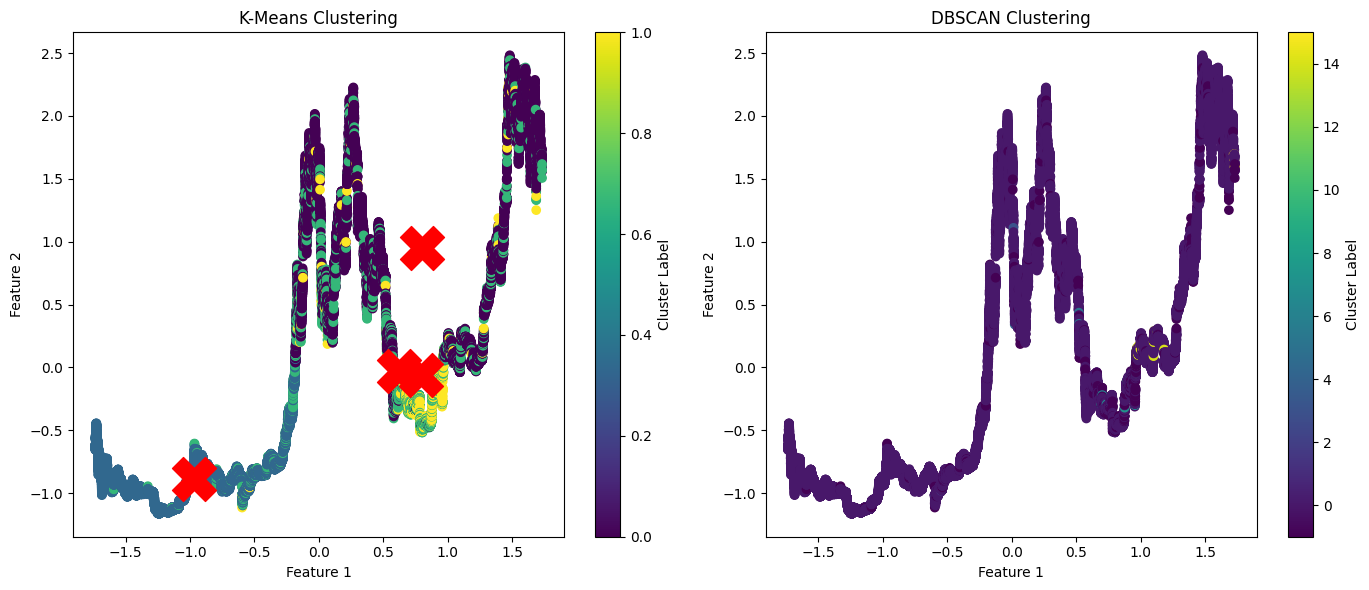

In [74]:
# Visualize K-Means results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], s=1000, c='red', marker='X')  # Mark cluster centroids
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')  # Adds a colorbar to indicate cluster labels

# Visualize DBSCAN results
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')  # Adds a colorbar to indicate cluster labels

plt.tight_layout()
plt.show()

**Create a variable to store the performance of each model**

In [75]:
best_score = float('-inf')
best_model = None

**Train and evaluate each model**
**   **
After training and testing, **Linear Regression** has proven to be the best-performing algorithm. Since the model's performance is already very high, there is no need for further optimization or performance enhancement.

In [76]:
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions on the test set
    score = model.score(X_test, y_test)  # Calculate model performance
    print(f"{name}: R^2 Score = {score}")

    # If the current model's score is better than the best score so far,
    # update the best model to the current one
    if score > best_score:
        best_score = score
        best_model = model

Linear Regression: R^2 Score = 0.9999728865440416
Decision Tree: R^2 Score = 0.9999363742371337


**Model Evaluation - Loss Calculation for Regression**

In [77]:
mse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
mae_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')

# Remove the negative sign MSE and MAE.
mse_scores = -mse_scores
mae_scores = -mae_scores

print(f"Mean Squared Error: {mse_scores.mean()} ± {mse_scores.std()}")
print(f"Mean Absolute Error: {mae_scores.mean()} ± {mae_scores.std()}")

Mean Squared Error: 255092.24559688513 ± 306049.3780956492
Mean Absolute Error: 279.6503123765884 ± 265.00503167540006
